In [1]:
import pandas as pd

df = pd.read_csv("listings.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9220 entries, 0 to 9219
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9220 non-null   int64  
 1   name                            9220 non-null   object 
 2   host_id                         9220 non-null   int64  
 3   host_name                       9219 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   9220 non-null   object 
 6   latitude                        9220 non-null   float64
 7   longitude                       9220 non-null   float64
 8   room_type                       9220 non-null   object 
 9   price                           8074 non-null   float64
 10  minimum_nights                  9220 non-null   int64  
 11  number_of_reviews               9220 non-null   int64  
 12  last_review                     74

In [29]:
df.sort_values(by="price", ascending=False).head(10)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
53,1828984,Getaway Ledro - Three-room-apartment 4/6 people,9546806,Valeria,NaN,Trentino,45.896740,10.722020,Entire home/apt,20000.0,1,9,2025-09-19,0.12,30,0,3,IT022229C2P346WWOA
5318,929530691094663019,Appartamento per 4 persone,518519579,Tommaso,NaN,Trentino,46.178860,11.836000,Entire home/apt,18000.0,2,4,2025-08-18,0.30,2,143,3,IT022245C2SKKGXNQF
4440,746030440698137666,Casa Loretta,469063834,Michael,NaN,Trentino,46.463291,11.779601,Entire home/apt,10022.0,1,9,2025-08-20,0.35,9,363,5,IT022039C2NPU59MBY
8888,1476039432881421784,LaDino House,159966102,Novasol,NaN,Trentino,46.083279,10.928854,Entire home/apt,10021.0,1,2,2025-09-23,1.54,1,331,2,IT022231C2S5M3FMG9
5232,914212674908847170,Baidoni Secondo piano,153915594,Novasol,NaN,Trentino,45.807284,10.541478,Entire home/apt,10013.0,1,3,2025-08-09,0.12,2,153,1,IT022021C277VZ2PPQ
4192,656492968469928273,Lovely apartment in Comano Terme,154026976,Novasol,NaN,Trentino,46.025939,10.819929,Entire home/apt,10011.0,1,2,2024-08-24,0.07,1,11,0,IT022017B45QNI8NSS
8625,1448649244141466851,House Cuel Milena Folgaria - Green,521070343,Michael,NaN,Trentino,45.914181,11.181945,Entire home/apt,10006.0,1,0,NaN,NaN,22,364,0,IT022087C2CFXUP77L
7980,1389286645820326333,Tanas,593323434,Michael,NaN,Trentino,45.932017,10.819524,Entire home/apt,10000.0,1,0,NaN,NaN,40,362,0,IT022191B4TKPV36IW
8378,1426645531064183119,La Rocca Camere con bagno,593323434,Michael,NaN,Trentino,45.874123,11.032505,Entire home/apt,10000.0,1,3,2025-08-17,1.27,40,363,3,IT022161C2ZLSLI4RK
8249,1413131971547760640,Ciasa de Lucky,513243640,Michael,NaN,Trentino,46.348790,11.627800,Entire home/apt,10000.0,1,0,NaN,NaN,21,359,0,IT022118C22ODW3JAW


In [5]:
df["name"].is_unique
df['host_id'].is_unique

False

In [ ]:
host_counts = df["host_id"].value_counts()
host_counts.head(25)

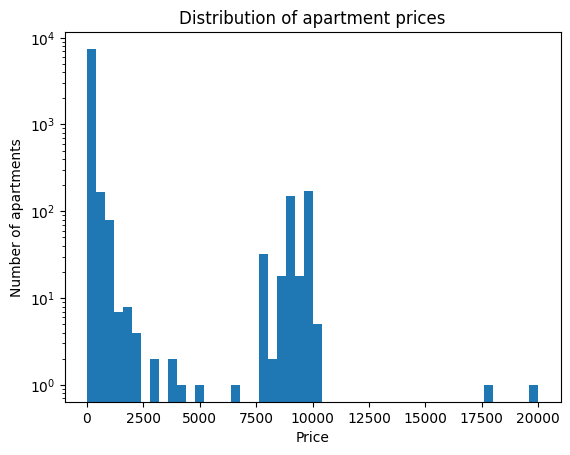

In [31]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["price"], bins=50, log=True)
plt.xlabel("Price")
plt.ylabel("Number of apartments")
plt.title("Distribution of apartment prices")
plt.show()

In [32]:
total_hosts = host_counts.shape[0]
cumulative_share = host_counts.cumsum() / host_counts.sum()
num_hosts_50pct = (cumulative_share <= 0.5).sum() + 1
pp = (num_hosts_50pct / total_hosts) * 100
print('total hosts: ', total_hosts)
print('percentage of hosts that have 50% of all airbnbs: ', round(pp, 2))

total hosts:  4614
percentage of hosts that have 50% of all airbnbs:  14.09


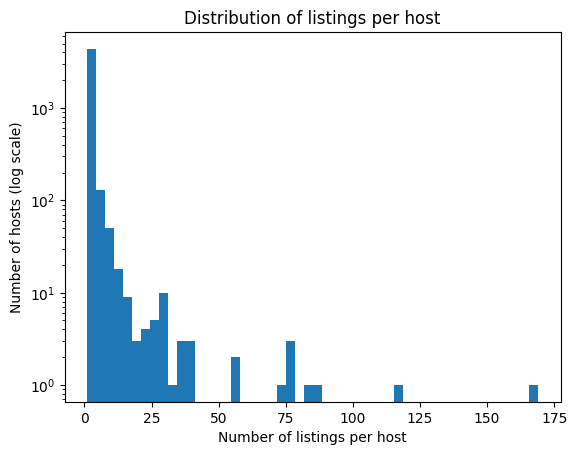

In [26]:
import matplotlib.pyplot as plt

host_counts = df["host_id"].value_counts()

plt.figure()
plt.hist(host_counts, bins=50, log=True)
plt.xlabel("Number of listings per host")
plt.ylabel("Number of hosts (log scale)")
plt.title("Distribution of listings per host")
plt.show()